In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df= pd.read_csv("breast_cancer_prediction.csv")

In [73]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [75]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [76]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [78]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [79]:
map_diagnosis= {"M":1, "B": 0}
df.replace(map_diagnosis,inplace=True)

In [80]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [81]:
df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

In [82]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [83]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:>

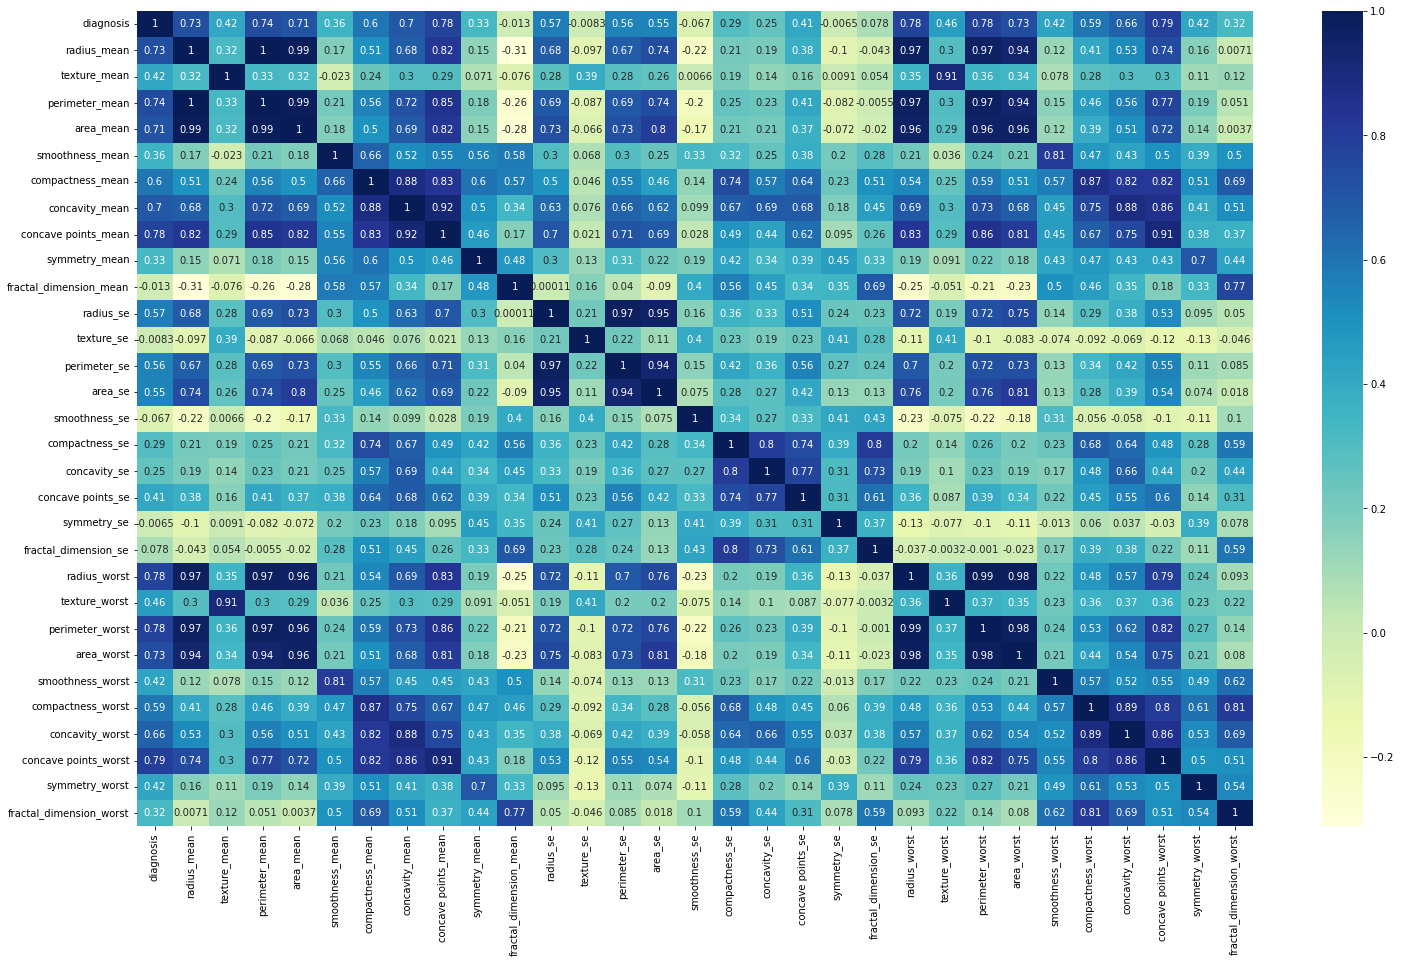

In [114]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

#Based on the above correlation matrix it can be observed that many featurs have multicollinearity and hence it is important to remove few features which shows multicollienarity so that the model is not biased. So, we are dropping few columns and later we can check the performance of non dropped columns in our model

In [115]:
y= df['diagnosis']
drop_corr=['radius_mean','perimeter_mean','concavity_mean', 'compactness_mean','concave points_mean',
           'radius_se','perimeter_se','concavity_se','concave points_se','fractal_dimension_se',
           'radius_worst','texture_worst','perimeter_worst','concavity_worst','concave points_worst',
           'compactness_worst','smoothness_worst','fractal_dimension_worst']
df_dropped= df.drop(drop_corr,axis=1)


In [116]:
df_dropped

,diagnosis,texture_mean,area_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,symmetry_se,area_worst,symmetry_worst
0,1,10.38,1001.0,0.11840,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.03003,2019.0,0.4601
1,1,17.77,1326.0,0.08474,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01389,1956.0,0.2750
2,1,21.25,1203.0,0.10960,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.02250,1709.0,0.3613
3,1,20.38,386.1,0.14250,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05963,567.7,0.6638
4,1,14.34,1297.0,0.10030,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.01756,1575.0,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,22.39,1479.0,0.11100,0.1726,0.05623,1.2560,158.70,0.010300,0.02891,0.01114,2027.0,0.2060
565,1,28.25,1261.0,0.09780,0.1752,0.05533,2.4630,99.04,0.005769,0.02423,0.01898,1731.0,0.2572
566,1,28.08,858.1,0.08455,0.1590,0.05648,1.0750,48.55,0.005903,0.03731,0.01318,1124.0,0.2218
567,1,29.33,1265.0,0.11780,0.2397,0.07016,1.5950,86.22,0.006522,0.06158,0.02324,1821.0,0.4087


<AxesSubplot:>

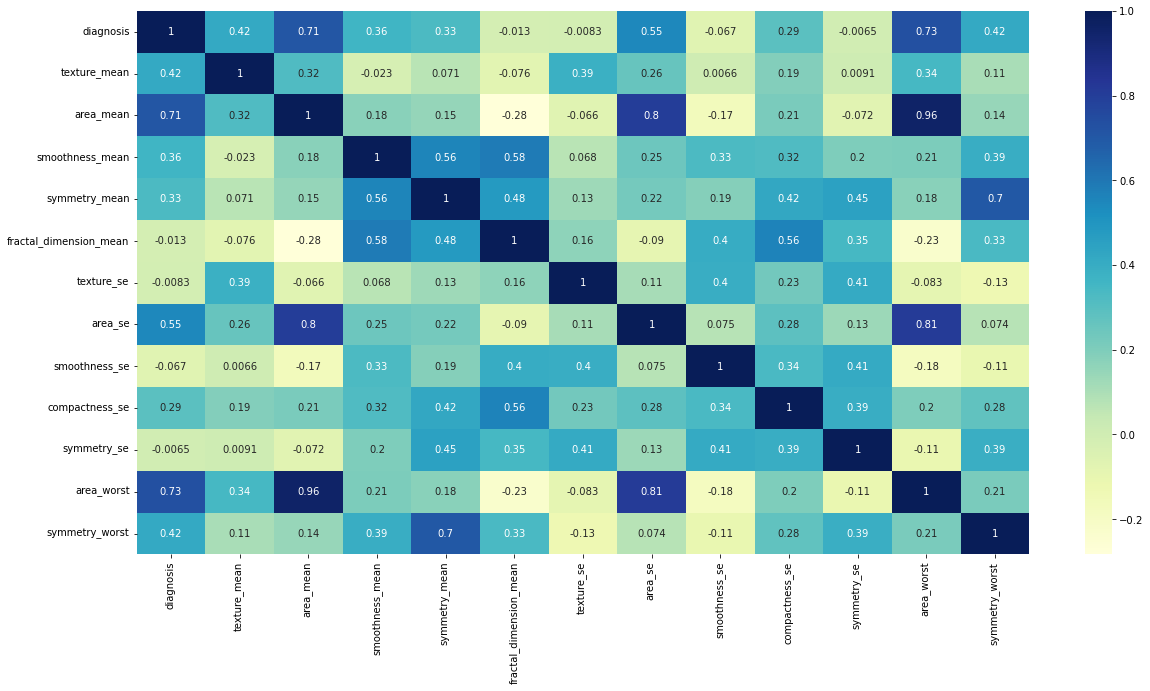

In [117]:
plt.figure(figsize=(20,10))
sns.heatmap(df_dropped.corr(),annot=True,cmap="YlGnBu")

The above correlation matrix shows that out of few features which we selected, area_mean, concave points_mean,area_worst and concave points_worst could be a good predictor whether the tumor is malignant or benign. Also, we can see still there are multicollinearity between few more features.

In [88]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


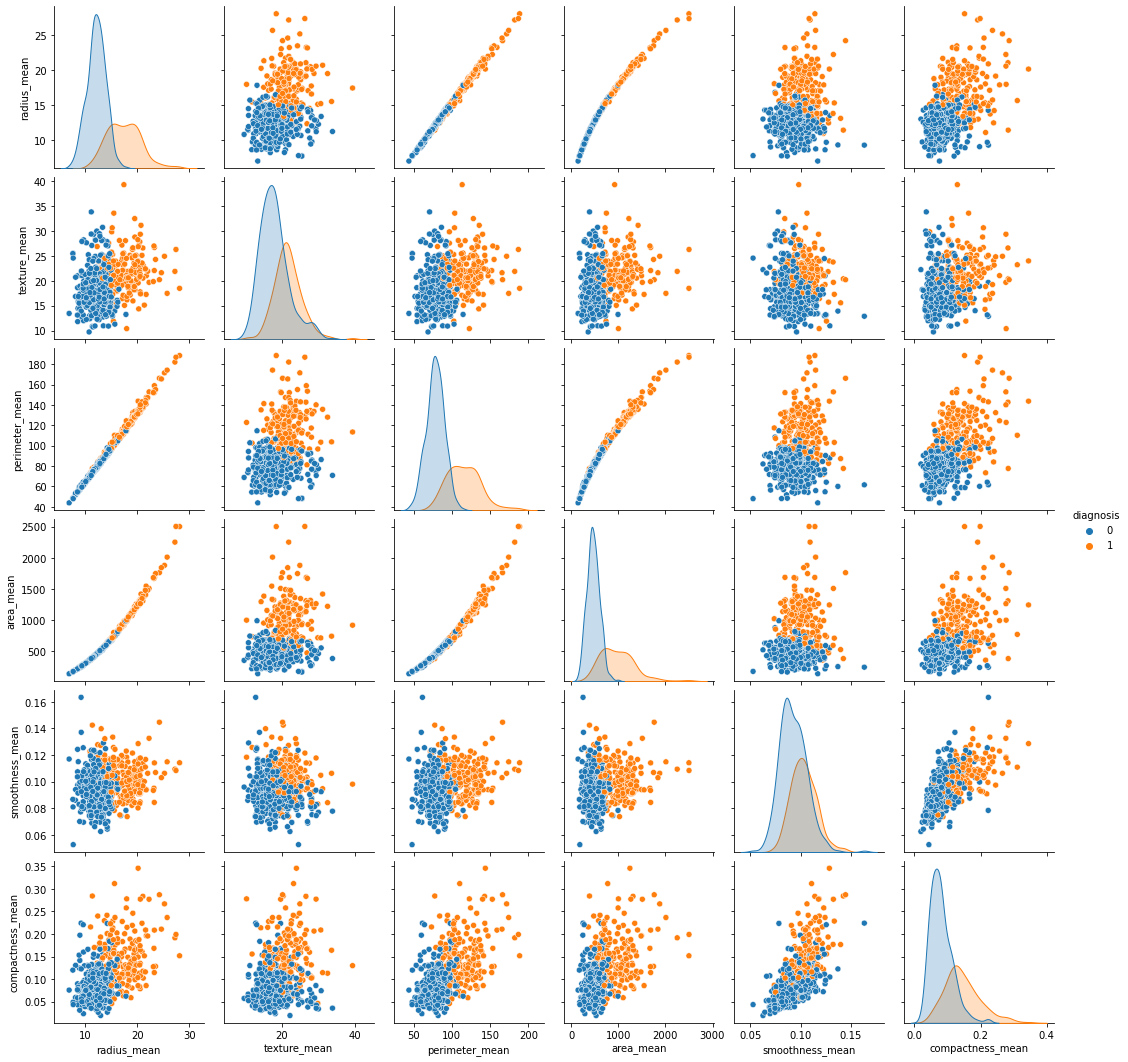

In [89]:
feature_pairplot= ['radius_mean','texture_mean','perimeter_mean','area_mean',
                   'smoothness_mean','compactness_mean']
sns.pairplot(df,vars=feature_pairplot,hue='diagnosis')

From the above pairplot the following could be interpreted:
1. Positive linear relationship- A positive linear relationship could be seen between radius_mean and area_mea,radius_mean and perimeter_mean, meaning the increase in radius tends to increase the perimeter as well as area of the tumor. Which is pretty obvious.
2. Benign tumor tends to have smaller radius, area and perimter as compared to malignant tumors. The larger the tumor, higher chances that it will be malignant.


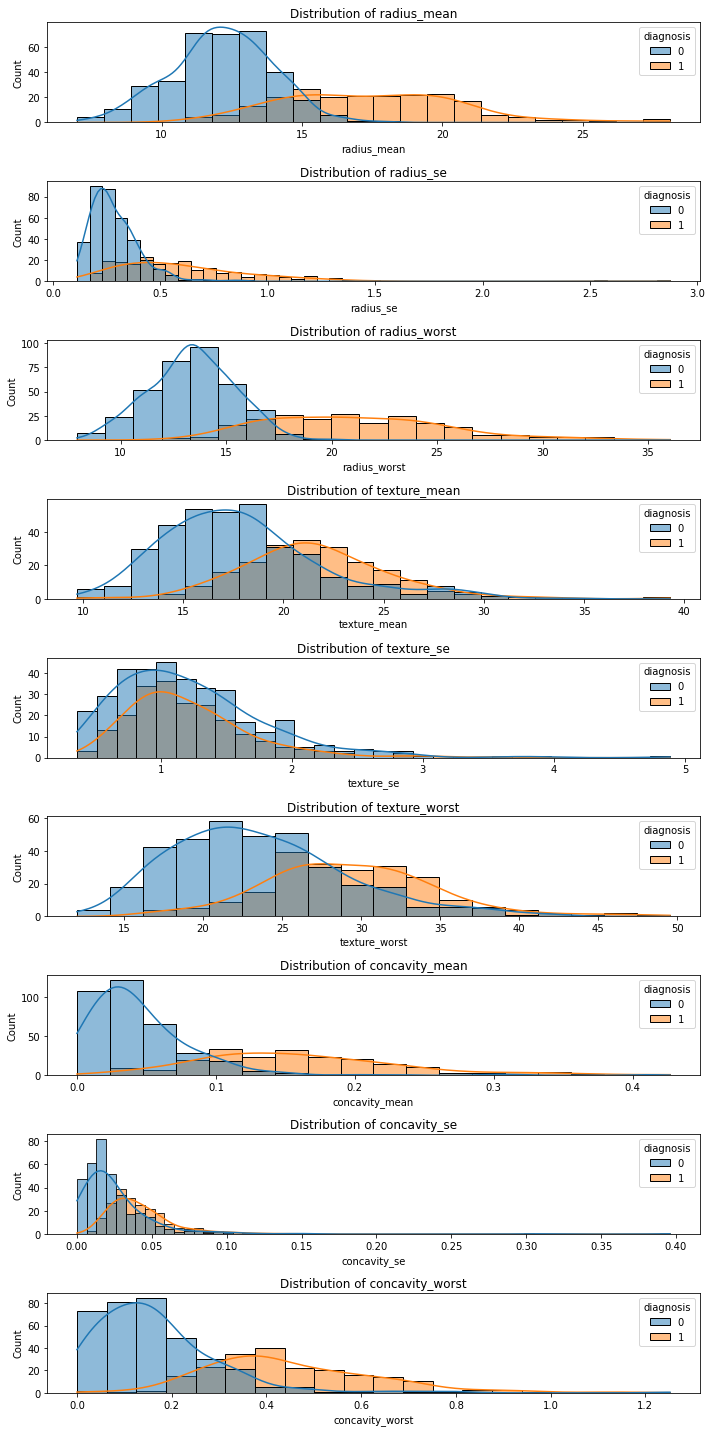

In [90]:
#Creating histogram plot for few features
feature_histplot= ['radius_mean','radius_se','radius_worst','texture_mean','texture_se','texture_worst',
                  'concavity_mean','concavity_se','concavity_worst']

fig, axes= plt.subplots(nrows= len(feature_histplot),ncols=1,figsize=(10,20))
for i,column in enumerate(feature_histplot):
    sns.histplot(df,x=column,hue='diagnosis',ax=axes[i],kde=True)
    #formatted string literals, f-strings are string literals that have an f before the opening quotation mark.
    #They can include Python expressions enclosed in curly braces. 
    axes[i].set_title(f'Distribution of {column}') 
plt.tight_layout()

Observations made on the basis of histplot plotted above:
1. Radius- The radius_mean, radius_se, and radius_worst for malignant tumor is highera and mostly skewed towards right side, meaning the tumors which are malignant are mostly higher in radius.
2. Texture - From the plot it can be interpreted that texture of malignant tumor has higher distribution. It could be possible that the malignant tumor has somewhat rougher texture.
3. Concavity- Seeing the distribution of concavity_mean, concavity_se, and concavity_worst, the malignant tumor tends to have the higher distribution and deeper concavities.

In [118]:
# Splitting data for dependent and independent variable
X= df_dropped.drop('diagnosis',axis=1)
y= df_dropped['diagnosis']

In [119]:
#Test and train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)

(398, 12)
(171, 12)


## Logistic Regression Model

In [120]:
# Importing the logistic model and metric from sklear library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [121]:
lg_model = LogisticRegression()

In [122]:
lg_model.fit(X_train,y_train)

/Users/shivanitripathi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
y_pred = lg_model.predict(X_test)

In [124]:
accuracy = accuracy_score(y_test,y_pred)*100
cf_matrix = confusion_matrix(y_test,y_pred)

In [125]:
print('Accuracy Score :',accuracy,'%')
print('Confusion Matrix :\n' , cf_matrix )

Accuracy Score : 97.07602339181285 %
Confusion Matrix :
 [[105   3]
 [  2  61]]


In [126]:
df_comparison= pd.DataFrame({'Y True': y_test, 'Y Predicted' : y_pred})
df_comparison

,Y True,Y Predicted
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0
...,...,...
69,0,0
542,0,1
176,0,0
501,1,1


## Decision Tree Model

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf= DecisionTreeClassifier()